<a href="https://colab.research.google.com/github/ajay1808/NeuralNetworks/blob/main/The_Famous_MNIST_Problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a try to achieve a high level of accuracy in the MNIST Problem using Neural Networks.

In [1]:
%tensorflow_version 2.x
from __future__ import absolute_import, division, print_function, unicode_literals

In [2]:
# Import the relevant Modules
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
from tensorflow.keras import layers
from matplotlib import pyplot as plt

pd.options.display.max_rows = 15
pd.options.display.float_format = "{:.1f}".format

np.set_printoptions(linewidth = 250)

Now lets import the Training and Test Data for the MNIST dataset from the Keras Library

In [3]:
(x_train, y_train),(x_test, y_test) = tf.keras.datasets.mnist.load_data()


11501568/11490434 [==============================] - 0s 0us/step


In [4]:
print("Length of x_train: ",len(x_train))
print("Length of x_test:",len(x_test))
print("Length of y_train: ",len(y_train))
print("Length of y_test:",len(y_test))

Length of x_train:  60000
Length of x_test: 10000
Length of y_train:  60000
Length of y_test: 10000


In [5]:
x_train[2343]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0

In [6]:
len(x_train[2343])

28

In [7]:
len(x_train[2343][1])

28

We can Conclude that our data is of the format 28 x 28 for each entry. With each digit marked on a scale from 0-255

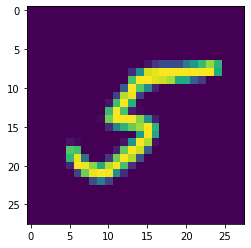

In [8]:
plt.imshow(x_train[2343])

In [9]:
#Normalizing the Data
x_train_normalized = x_train / 255.0
x_test_normalized = x_test / 255.0

In [10]:
#Plotting Function
def Metric_Plot(epochs, hist, list_of_metrics):

  for m in list_of_metrics:
    sns.lineplot(data=hist,x=hist["Epoch"], y= hist[m],legend = "full",sizes=(.25, 2.5))

In [26]:
#Neural Network

def create_model(my_learning_rate):
  model = tf.keras.models.Sequential()

  #Input Layers
  model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
  
  #Hidden Layers
  model.add(tf.keras.layers.Dense(units=256, activation='relu'))
  model.add(tf.keras.layers.Dense(units=128, activation='relu'))
  '''
  model.add(tf.keras.layers.Dense(units=64, activation='relu'))
  model.add(tf.keras.layers.Dense(
    32, input_dim=32,
    kernel_initializer='ones',
    kernel_regularizer=tf.keras.regularizers.L1(0.01),
    activity_regularizer=tf.keras.regularizers.L2(0.01)))
  '''
  model.add(tf.keras.layers.Dropout(rate=0.2))
  
  #Output
  model.add(tf.keras.layers.Dense(units=10, activation='softmax'))     
                           
   
  model.compile(optimizer=tf.keras.optimizers.Adam(lr=my_learning_rate),
                loss="sparse_categorical_crossentropy",
                metrics=['accuracy'])
  
  return model    


def train_model(model, train_features, train_label, epochs,
                batch_size=None, validation_split=0.1):

  history = model.fit(x=train_features, y=train_label, batch_size=batch_size,
                      epochs=epochs, shuffle=True, 
                      validation_split=validation_split)
 
  epochs = history.epoch
  hist = pd.DataFrame(history.history)

  return epochs, hist    

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


12/12 [==============================] - 2s 111ms/step - loss: 0.9939 - accuracy: 0.7068 - val_loss: 0.3295 - val_accuracy: 0.9024
Epoch 2/50
12/12 [==============================] - 1s 95ms/step - loss: 0.3447 - accuracy: 0.8975 - val_loss: 0.2366 - val_accuracy: 0.9309
Epoch 3/50
12/12 [==============================] - 1s 95ms/step - loss: 0.2439 - accuracy: 0.9292 - val_loss: 0.1806 - val_accuracy: 0.9473
Epoch 4/50
12/12 [==============================] - 1s 94ms/step - loss: 0.1888 - accuracy: 0.9447 - val_loss: 0.1521 - val_accuracy: 0.9558
Epoch 5/50
12/12 [==============================] - 1s 96ms/step - loss: 0.1555 - accuracy: 0.9541 - val_loss: 0.1337 - val_accuracy: 0.9617
Epoch 6/50
12/12 [==============================] - 1s 95ms/step - loss: 0.1309 - accuracy: 0.9613 - val_loss: 0.1203 - val_accuracy: 0.9651
Epoch 7/50
12/12 [==============================] - 1s 94ms/step - loss: 0.1129 - accuracy: 0.9670 - val_loss: 0.1111 - val_accuracy: 0.9668
Epoch 8/50
12/12 [=====

[0.07918252050876617, 0.980400025844574]

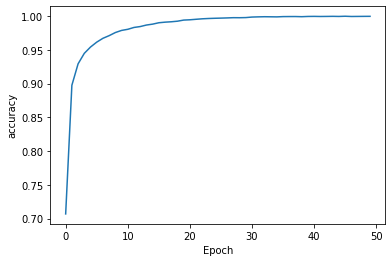

In [27]:
#Adjust Hyperparameters
learning_rate = 0.003
epochs = 50
batch_size = 4000
validation_split = 0.2


#Create and Train Model
my_model = create_model(learning_rate)
epochs, hist = train_model(my_model, x_train_normalized, y_train, 
                           epochs, batch_size, validation_split)
#Mention the metrics required to PLot
list_of_metrics_to_plot = ['accuracy']


histtable = pd.DataFrame(hist)
histtable["Epoch"] = np.arange(len(histtable))
Metric_Plot(epochs, histtable, list_of_metrics_to_plot)


#Check Model Performace
print("\n Evaluate the new model against the test set:")
my_model.evaluate(x=x_test_normalized, y=y_test, batch_size=batch_size)